### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


# Import libriaries : 

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs

## Ids of Cities Tanger and Benguerir :

In [375]:
id_Tanger = "701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c"
id_Benguerir = "f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111"

## Forcasting Weather of Benguerir City :

In [376]:
#id_City = str(input("Enter the id of Benguerir City : "))
Forcast_Benguerir_request = requests.get("https://weather.com/fr-MA/temps/10jours/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111")

In [377]:
Forcast_content = bs(Forcast_Benguerir_request.content, 'lxml')
type(Forcast_content)

bs4.BeautifulSoup

In [378]:
Forcast_Benguerir = Forcast_content.find('div', id = "WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
Forcast_Benguerir_summaries = Forcast_Benguerir.find_all('summary')

### Function of get all information from summary :

In [379]:
def get_all_info(summary):
    df = [] 
    a = summary.find('h3')
    if  a != None:
        if a.get_text() not in days:
             df.append(a.get_text())
                
    for i in summary.find('div').find_all('div'):
        c = i.find_all('span')
        for span in c:
            df.append(span.get_text())
            
        break
    return df

### Get all information from summary  of Benguerir City:

In [380]:
df = [get_all_info_days(Forcast_Benguerir_summaries[b]) for b in range(1,15)]
df

[['dim. 18', '22°', '/8°', '8°', 'Peu nuageux', '15%', 'ESE 11 km/h'],
 ['lun. 19', '23°', '/7°', '7°', 'Plutôt ensoleillé', '8%', 'E 12 km/h'],
 ['mar. 20', '23°', '/7°', '7°', 'Peu nuageux', '7%', 'SSO 13 km/h'],
 ['mer. 21', '22°', '/7°', '7°', 'Plutôt ensoleillé', '7%', 'ENE 13 km/h'],
 ['jeu. 22', '21°', '/6°', '6°', 'Ensoleillé', '10%', 'ENE 12 km/h'],
 ['ven. 23', '22°', '/6°', '6°', 'Ensoleillé', '8%', 'SSO 14 km/h'],
 ['sam. 24', '21°', '/7°', '7°', 'Plutôt ensoleillé', '7%', 'SSO 13 km/h'],
 ['dim. 25', '21°', '/8°', '8°', 'Plutôt ensoleillé', '11%', 'S 14 km/h'],
 ['lun. 26', '19°', '/8°', '8°', 'Peu nuageux', '17%', 'SSO 20 km/h'],
 ['mar. 27', '19°', '/9°', '9°', 'Peu nuageux', '13%', 'S 15 km/h'],
 ['mer. 28', '20°', '/8°', '8°', 'Peu nuageux', '9%', 'S 13 km/h'],
 ['jeu. 29', '20°', '/9°', '9°', 'Très nuageux', '12%', 'SSO 16 km/h'],
 ['ven. 30', '20°', '/9°', '9°', 'Peu nuageux', '10%', 'SSO 15 km/h'],
 ['sam. 31', '21°', '/8°', '8°', 'Peu nuageux', '5%', 'SSO 15 km/h']

### Create a columns of Data :

In [381]:
columns = ['Day', 'Max_Temperature', 'Min_Temperature1', 
           'Min_Temperature', 'State', 'Percentage_Value', 'Wind_Speed']

### Create Data of forcasting weather of Benguerir City :

In [382]:
Benguerir_data = pd.DataFrame(data=df, columns = columns)

In [383]:
Benguerir_data

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,State,Percentage_Value,Wind_Speed
0,dim. 18,22°,/8°,8°,Peu nuageux,15%,ESE 11 km/h
1,lun. 19,23°,/7°,7°,Plutôt ensoleillé,8%,E 12 km/h
2,mar. 20,23°,/7°,7°,Peu nuageux,7%,SSO 13 km/h
3,mer. 21,22°,/7°,7°,Plutôt ensoleillé,7%,ENE 13 km/h
4,jeu. 22,21°,/6°,6°,Ensoleillé,10%,ENE 12 km/h
5,ven. 23,22°,/6°,6°,Ensoleillé,8%,SSO 14 km/h
6,sam. 24,21°,/7°,7°,Plutôt ensoleillé,7%,SSO 13 km/h
7,dim. 25,21°,/8°,8°,Plutôt ensoleillé,11%,S 14 km/h
8,lun. 26,19°,/8°,8°,Peu nuageux,17%,SSO 20 km/h
9,mar. 27,19°,/9°,9°,Peu nuageux,13%,S 15 km/h


### Deletion of the repeated column : 

In [384]:
del(Benguerir_data["Min_Temperature1"])

### Printing the Benguerir data of forcasting weather :

In [385]:
Benguerir_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Wind_Speed
0,dim. 18,22°,8°,Peu nuageux,15%,ESE 11 km/h
1,lun. 19,23°,7°,Plutôt ensoleillé,8%,E 12 km/h
2,mar. 20,23°,7°,Peu nuageux,7%,SSO 13 km/h
3,mer. 21,22°,7°,Plutôt ensoleillé,7%,ENE 13 km/h
4,jeu. 22,21°,6°,Ensoleillé,10%,ENE 12 km/h
5,ven. 23,22°,6°,Ensoleillé,8%,SSO 14 km/h
6,sam. 24,21°,7°,Plutôt ensoleillé,7%,SSO 13 km/h
7,dim. 25,21°,8°,Plutôt ensoleillé,11%,S 14 km/h
8,lun. 26,19°,8°,Peu nuageux,17%,SSO 20 km/h
9,mar. 27,19°,9°,Peu nuageux,13%,S 15 km/h


## Forcasting Weather of Tanger City :

In [386]:
#id_City = str(input("Enter the id of Tanger City : "))
Forcast_Tanger_request = requests.get("https://weather.com/fr-MA/temps/10jours/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c")

In [387]:
Forcast_content = bs(Forcast_Tanger_request.content, 'lxml')
type(Forcast_content)

bs4.BeautifulSoup

In [388]:
Forcast_Tanger = Forcast_content.find('div', id = "WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
Forcast_Tanger_summaries = Forcast_Tanger.find_all('summary')

### Get all information from summary  of Tanger City:

In [389]:
df_1 = [get_all_info_days(Forcast_Tanger_summaries[b]) for b in range(1,15)]
df_1

[['dim. 18', '20°', '/15°', '15°', 'Peu nuageux', '14%', 'E 24 km/h'],
 ['lun. 19', '21°', '/14°', '14°', 'Peu nuageux', '12%', 'E 18 km/h'],
 ['mar. 20',
  '21°',
  '/16°',
  '16°',
  "Averses dans l'après-midi",
  '45%',
  'SE 13 km/h'],
 ['mer. 21',
  '19°',
  '/13°',
  '13°',
  'Averses dans la matinée',
  '49%',
  'SO 9 km/h'],
 ['jeu. 22', '19°', '/12°', '12°', 'Plutôt ensoleillé', '12%', 'NE 8 km/h'],
 ['ven. 23', '19°', '/13°', '13°', 'Ensoleillé', '12%', 'S 7 km/h'],
 ['sam. 24',
  '19°',
  '/13°',
  '13°',
  "Averses dans l'après-midi",
  '35%',
  'S 9 km/h'],
 ['dim. 25', '20°', '/14°', '14°', 'Peu nuageux', '24%', 'SE 14 km/h'],
 ['lun. 26', '18°', '/14°', '14°', 'Averses', '44%', 'SE 20 km/h'],
 ['mar. 27',
  '18°',
  '/14°',
  '14°',
  'Averses dans la matinée',
  '50%',
  'S 18 km/h'],
 ['mer. 28', '18°', '/14°', '14°', 'Averses', '41%', 'SE 17 km/h'],
 ['jeu. 29', '18°', '/14°', '14°', 'Averses', '38%', 'S 18 km/h'],
 ['ven. 30', '18°', '/15°', '15°', 'Averses', '54%', 

### Create Data of forcasting weather of Tanger City :

In [390]:
Tanger_data = pd.DataFrame(data=df_1, columns = columns)

In [391]:
Tanger_data

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,State,Percentage_Value,Wind_Speed
0,dim. 18,20°,/15°,15°,Peu nuageux,14%,E 24 km/h
1,lun. 19,21°,/14°,14°,Peu nuageux,12%,E 18 km/h
2,mar. 20,21°,/16°,16°,Averses dans l'après-midi,45%,SE 13 km/h
3,mer. 21,19°,/13°,13°,Averses dans la matinée,49%,SO 9 km/h
4,jeu. 22,19°,/12°,12°,Plutôt ensoleillé,12%,NE 8 km/h
5,ven. 23,19°,/13°,13°,Ensoleillé,12%,S 7 km/h
6,sam. 24,19°,/13°,13°,Averses dans l'après-midi,35%,S 9 km/h
7,dim. 25,20°,/14°,14°,Peu nuageux,24%,SE 14 km/h
8,lun. 26,18°,/14°,14°,Averses,44%,SE 20 km/h
9,mar. 27,18°,/14°,14°,Averses dans la matinée,50%,S 18 km/h


### Deletion of the repeated column : 

In [392]:
del(Tanger_data["Min_Temperature1"])

### Printing the Tanger data of forcasting weather :

In [393]:
Tanger_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Wind_Speed
0,dim. 18,20°,15°,Peu nuageux,14%,E 24 km/h
1,lun. 19,21°,14°,Peu nuageux,12%,E 18 km/h
2,mar. 20,21°,16°,Averses dans l'après-midi,45%,SE 13 km/h
3,mer. 21,19°,13°,Averses dans la matinée,49%,SO 9 km/h
4,jeu. 22,19°,12°,Plutôt ensoleillé,12%,NE 8 km/h
5,ven. 23,19°,13°,Ensoleillé,12%,S 7 km/h
6,sam. 24,19°,13°,Averses dans l'après-midi,35%,S 9 km/h
7,dim. 25,20°,14°,Peu nuageux,24%,SE 14 km/h
8,lun. 26,18°,14°,Averses,44%,SE 20 km/h
9,mar. 27,18°,14°,Averses dans la matinée,50%,S 18 km/h


### Create a new data of raining days in Tanger City : 

In [394]:
L = []
for i in range(len(Tanger_data["Percentage_Value"])):
    L.append(Tanger_data["Percentage_Value"][i])


In [395]:
new_L = []
for i in L:
    new_L.append(i.replace('%', ''))

In [396]:
T = []
for i in range(len(new_L)):
    T.append(int(new_L[i]))

In [397]:
Tanger_data.insert(loc = 5,
          column='Int_Percentage_Value',
          value = T)

In [398]:
Tanger_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,dim. 18,20°,15°,Peu nuageux,14%,14,E 24 km/h
1,lun. 19,21°,14°,Peu nuageux,12%,12,E 18 km/h
2,mar. 20,21°,16°,Averses dans l'après-midi,45%,45,SE 13 km/h
3,mer. 21,19°,13°,Averses dans la matinée,49%,49,SO 9 km/h
4,jeu. 22,19°,12°,Plutôt ensoleillé,12%,12,NE 8 km/h
5,ven. 23,19°,13°,Ensoleillé,12%,12,S 7 km/h
6,sam. 24,19°,13°,Averses dans l'après-midi,35%,35,S 9 km/h
7,dim. 25,20°,14°,Peu nuageux,24%,24,SE 14 km/h
8,lun. 26,18°,14°,Averses,44%,44,SE 20 km/h
9,mar. 27,18°,14°,Averses dans la matinée,50%,50,S 18 km/h


In [412]:
Tanger_data_possibilty_raining = Tanger_data.loc[Tanger_data["Int_Percentage_Value"] >= 10]

In [415]:
Tanger_data_possibilty_raining

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,dim. 18,20°,15°,Peu nuageux,14%,14,E 24 km/h
1,lun. 19,21°,14°,Peu nuageux,12%,12,E 18 km/h
2,mar. 20,21°,16°,Averses dans l'après-midi,45%,45,SE 13 km/h
3,mer. 21,19°,13°,Averses dans la matinée,49%,49,SO 9 km/h
4,jeu. 22,19°,12°,Plutôt ensoleillé,12%,12,NE 8 km/h
5,ven. 23,19°,13°,Ensoleillé,12%,12,S 7 km/h
6,sam. 24,19°,13°,Averses dans l'après-midi,35%,35,S 9 km/h
7,dim. 25,20°,14°,Peu nuageux,24%,24,SE 14 km/h
8,lun. 26,18°,14°,Averses,44%,44,SE 20 km/h
9,mar. 27,18°,14°,Averses dans la matinée,50%,50,S 18 km/h


### Create a new data of raining days in Benguerir City : 

In [399]:
L1 = []
for i in range(len(Benguerir_data["Percentage_Value"])):
    L1.append(Benguerir_data["Percentage_Value"][i])

In [400]:
new_L1 = []
for i in L1:
    new_L1.append(i.replace('%', ''))

In [401]:
B = []
for i in range(len(new_L1)):
    B.append(int(new_L1[i]))

In [402]:
Benguerir_data.insert(loc = 5,
          column='Int_Percentage_Value',
          value = B)

In [403]:
Benguerir_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,dim. 18,22°,8°,Peu nuageux,15%,15,ESE 11 km/h
1,lun. 19,23°,7°,Plutôt ensoleillé,8%,8,E 12 km/h
2,mar. 20,23°,7°,Peu nuageux,7%,7,SSO 13 km/h
3,mer. 21,22°,7°,Plutôt ensoleillé,7%,7,ENE 13 km/h
4,jeu. 22,21°,6°,Ensoleillé,10%,10,ENE 12 km/h
5,ven. 23,22°,6°,Ensoleillé,8%,8,SSO 14 km/h
6,sam. 24,21°,7°,Plutôt ensoleillé,7%,7,SSO 13 km/h
7,dim. 25,21°,8°,Plutôt ensoleillé,11%,11,S 14 km/h
8,lun. 26,19°,8°,Peu nuageux,17%,17,SSO 20 km/h
9,mar. 27,19°,9°,Peu nuageux,13%,13,S 15 km/h


In [413]:
Benguerir_data_possibilty_raining = Benguerir_data.loc[Benguerir_data["Int_Percentage_Value"] >= 10]

In [414]:
Benguerir_data_possibilty_raining

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,dim. 18,22°,8°,Peu nuageux,15%,15,ESE 11 km/h
4,jeu. 22,21°,6°,Ensoleillé,10%,10,ENE 12 km/h
7,dim. 25,21°,8°,Plutôt ensoleillé,11%,11,S 14 km/h
8,lun. 26,19°,8°,Peu nuageux,17%,17,SSO 20 km/h
9,mar. 27,19°,9°,Peu nuageux,13%,13,S 15 km/h
11,jeu. 29,20°,9°,Très nuageux,12%,12,SSO 16 km/h
12,ven. 30,20°,9°,Peu nuageux,10%,10,SSO 15 km/h


### Concatenation of Tanger Data City and Benguerir Data City : 

In [404]:
list_of_data = [Benguerir_data, Tanger_data]
result = pd.concat(list_of_data, keys = ["Benguerir", "Tanger"])
result

Day Max_Temperature Min_Temperature  \
Benguerir 0   dim. 18             22°              8°   
          1   lun. 19             23°              7°   
          2   mar. 20             23°              7°   
          3   mer. 21             22°              7°   
          4   jeu. 22             21°              6°   
          5   ven. 23             22°              6°   
          6   sam. 24             21°              7°   
          7   dim. 25             21°              8°   
          8   lun. 26             19°              8°   
          9   mar. 27             19°              9°   
          10  mer. 28             20°              8°   
          11  jeu. 29             20°              9°   
          12  ven. 30             20°              9°   
          13  sam. 31             21°              8°   
Tanger    0   dim. 18             20°             15°   
          1   lun. 19             21°             14°   
          2   mar. 20             21°             16°   
          3   mer. 21             19°             13°   
          4   jeu. 22             19°             12°   
          5   ven. 23             19°             13°   
          6   sam. 24             19°             13°   
          7   dim. 25             20°             14°   
          8   lun. 26             18°             14°   
          9   mar. 27             18°             14°   
          10  mer. 28             18°             14°   
          11  jeu. 29             18°             14°   
          12  ven. 30             18°             15°   
          13  sam. 31             18°             14°   

                                  State Percentage_Value  \
Benguerir 0                 Peu nuageux              15%   
          1           Plutôt ensoleillé               8%   
          2                 Peu nuageux               7%   
          3           Plutôt ensoleillé               7%   
          4                  Ensoleillé              10%   
          5                  Ensoleillé               8%   
          6           Plutôt ensoleillé               7%   
          7           Plutôt ensoleillé              11%   
          8                 Peu nuageux              17%   
          9                 Peu nuageux              13%   
          10                Peu nuageux               9%   
          11               Très nuageux              12%   
          12                Peu nuageux              10%   
          13                Peu nuageux               5%   
Tanger    0                 Peu nuageux              14%   
          1                 Peu nuageux              12%   
          2   Averses dans l'après-midi              45%   
          3     Averses dans la matinée              49%   
          4           Plutôt ensoleillé              12%   
          5                  Ensoleillé              12%   
          6   Averses dans l'après-midi              35%   
          7                 Peu nuageux              24%   
          8                     Averses              44%   
          9     Averses dans la matinée              50%   
          10                    Averses              41%   
          11                    Averses              38%   
          12                    Averses              54%   
          13                    Averses              51%   

              Int_Percentage_Value   Wind_Speed  
Benguerir 0                     15  ESE 11 km/h  
          1                      8    E 12 km/h  
          2                      7  SSO 13 km/h  
          3                      7  ENE 13 km/h  
          4                     10  ENE 12 km/h  
          5                      8  SSO 14 km/h  
          6                      7  SSO 13 km/h  
          7                     11    S 14 km/h  
          8                     17  SSO 20 km/h  
          9                     13    S 15 km/h  
          10                     9    S 13 km/h  
          11           

### Plotting the raining days in Tanger City And Benguerir City : 

In [243]:
import warnings
warnings.filterwarnings("ignore")

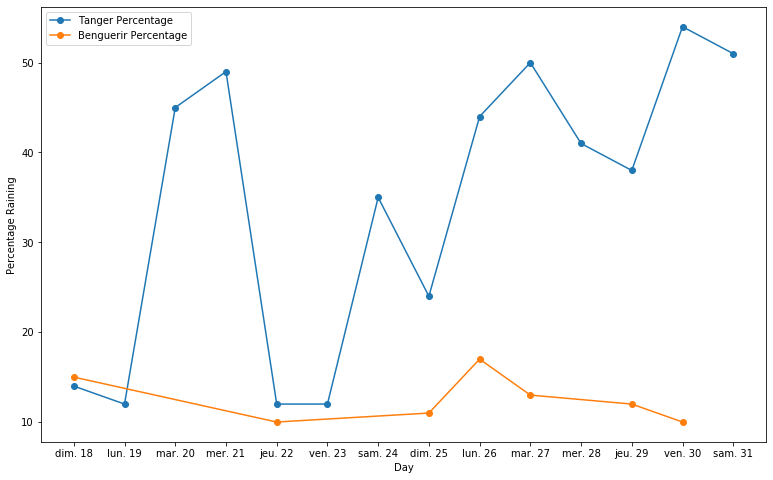

In [427]:
plt.figure(figsize = (13,8))
Day_1 = Tanger_data_possibilty_raining['Day']
Day_2 = Benguerir_data_possibilty_raining['Day']

plt.plot(Day_1,Tanger_data_possibilty_raining["Int_Percentage_Value"],marker = 'o', label = "Tanger Percentage")
plt.plot(Day_2,Benguerir_data_possibilty_raining["Int_Percentage_Value"],marker = 'o', label = "Benguerir Percentage")
plt.legend()
plt.locator_params('x',nbins = 20)
plt.xlabel('Day')
plt.ylabel('Percentage Raining')
plt.show()